In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV

from datetime import datetime

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
import warnings
warnings.filterwarnings('ignore')

matplotlib.rcParams.update({'font.size': 14})

In [78]:
TRAIN_DATASET_PATH = r'C:\Users\User\Desktop\test\train.csv'
TEST_DATASET_PATH = r'C:\Users\User\Desktop\test\test.csv'
train = pd.read_csv(TRAIN_DATASET_PATH)
test =  pd.read_csv(TEST_DATASET_PATH)                               

In [79]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

In [80]:
train.head()


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


In [81]:
test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,B,B,24,4378,0,1036.0,1,1,B
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
2,960,27,2.0,59.463678,NaN,9.0,19,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,B,B,2,475,0,NaN,0,0,B
4,746,74,1.0,53.837056,NaN,1.0,8,17.0,1977,0.309479,B,B,35,7715,4,990.0,0,6,B


In [82]:
train['Id'] = train['Id'].astype(str)
train['DistrictId'] = train['DistrictId'].astype(str)
train.dtypes

Id                object
DistrictId        object
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [83]:
train.shape[1] - 1 == test.shape[1]

True

In [84]:
train.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


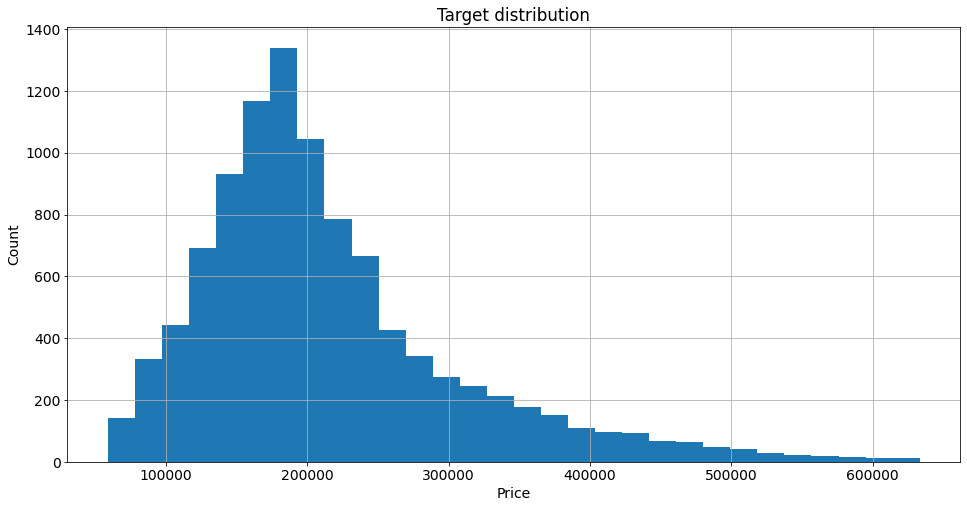

In [85]:
plt.figure(figsize = (16, 8))

train['Price'].hist(bins=30)
plt.ylabel('Count')
plt.xlabel('Price')

plt.title('Target distribution')
plt.show()

In [86]:
train.select_dtypes(include = 'object').columns.tolist()

['Id', 'DistrictId', 'Ecology_2', 'Ecology_3', 'Shops_2']

In [87]:
train['DistrictId'].value_counts()

27     851
1      652
23     565
6      511
9      294
      ... 
199      1
117      1
207      1
209      1
174      1
Name: DistrictId, Length: 205, dtype: int64

### Обработка выбросов

In [88]:
train.Rooms.unique()
train['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [89]:
train['Rooms_outlier'] = 0
train.loc[(train['Rooms']== 0)| (train['Rooms'] >= 6), 'Rooms_outlier'] == 1
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Rooms_outlier
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,...,B,11,3097,0,NaN,0,0,B,305018.871089,0
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,B,30,6207,1,1183.0,1,0,B,177734.553407,0
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,B,33,5261,0,240.0,3,1,B,282078.720850,0
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,...,B,1,264,0,NaN,0,1,B,168106.007630,0
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,B,33,8667,2,NaN,0,6,B,343995.102962,0


In [90]:
train.loc[train['Rooms'] == 0, 'Rooms'] = 1
train.loc[train['Rooms'] >=6, 'Rooms'] = train['Rooms'].median()


In [91]:
train['Rooms'].value_counts()

2.0    3884
1.0    3713
3.0    2235
4.0     150
5.0      18
Name: Rooms, dtype: int64

In [92]:
train['KitchenSquare'].value_counts()

1.0       2460
8.0       1306
5.0       1169
10.0      1075
6.0       1038
9.0        843
0.0        697
7.0        609
12.0       249
11.0       233
13.0        67
14.0        51
4.0         39
15.0        31
3.0         22
16.0        16
20.0        14
17.0        12
19.0        11
18.0         6
2.0          4
22.0         3
30.0         2
43.0         2
41.0         2
112.0        2
25.0         2
51.0         2
37.0         2
58.0         2
32.0         2
21.0         1
73.0         1
75.0         1
36.0         1
27.0         1
63.0         1
1970.0       1
54.0         1
53.0         1
60.0         1
26.0         1
66.0         1
39.0         1
29.0         1
78.0         1
31.0         1
84.0         1
48.0         1
96.0         1
42.0         1
40.0         1
23.0         1
72.0         1
35.0         1
62.0         1
123.0        1
2014.0       1
Name: KitchenSquare, dtype: int64

In [93]:
train['KitchenSquare'].quantile(.975), train['KitchenSquare'].quantile(.025)


(13.0, 0.0)

In [94]:
condition = (train['KitchenSquare'].isna()) | (train["KitchenSquare"] > train['KitchenSquare'].quantile(.975))

train.loc[condition, 'KitchenSquare'] = train['KitchenSquare'].median()

train.loc[train['KitchenSquare'] < 3, 'KitchenSquare'] = 3
train['KitchenSquare'].value_counts()

3.0     3183
8.0     1306
6.0     1227
5.0     1169
10.0    1075
9.0      843
7.0      609
12.0     249
11.0     233
13.0      67
4.0       39
Name: KitchenSquare, dtype: int64

In [95]:
train['HouseFloor'].sort_values().unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        36.,  37.,  38.,  39.,  40.,  44.,  45.,  47.,  48.,  99., 117.])

In [96]:
train['Floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 37, 42],
      dtype=int64)

In [97]:
train[(train['Floor'] > train['HouseFloor'])]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Rooms_outlier
17,1190,8,2.0,49.396000,28.299600,5.0,6,5.0,1962,0.458174,...,A,26,4439,1,1130.0,1,5,B,186971.926566,0
19,367,45,1.0,42.367289,40.012529,3.0,16,14.0,2015,0.195781,...,B,23,5212,6,NaN,3,2,B,250466.980777,0
21,8471,20,3.0,75.611065,47.494621,8.0,11,9.0,1976,0.019509,...,B,37,7687,11,176.0,5,5,B,366916.246494,0
24,4717,27,1.0,44.203947,NaN,3.0,2,0.0,1977,0.072158,...,B,2,629,1,NaN,0,0,A,135466.559958,0
25,4521,6,2.0,65.409965,NaN,3.0,18,1.0,1977,0.243205,...,B,5,1564,0,540.0,0,0,B,191205.272608,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9960,16258,48,3.0,96.056784,98.152802,3.0,15,1.0,2017,0.041125,...,B,46,9515,5,NaN,1,10,B,524365.550705,0
9968,9920,1,3.0,86.487550,NaN,3.0,18,17.0,1977,0.007122,...,B,1,264,0,NaN,0,1,B,248248.935528,0
9970,13501,6,1.0,41.310416,19.117077,9.0,18,17.0,1977,0.243205,...,B,5,1564,0,540.0,0,0,B,114878.830713,0
9975,4944,6,2.0,52.573133,NaN,3.0,18,17.0,1977,0.243205,...,B,5,1564,0,540.0,0,0,B,154366.031184,0


In [98]:
(train['Floor'] > train['HouseFloor']).sum()

1825

In [99]:
train['HouseFloor_outlier'] = 0
train.loc[(train['HouseFloor'] == 0) | (train['HouseFloor'] > 90), 'HouseFloor_outlier'] = 1
train.loc[train['Floor'] > train['HouseFloor'], 'HouseFloor_outlier'] = 1


In [100]:
train.loc[train['HouseFloor'] == 0, 'HouseFloor'] = train['HouseFloor'].median()
train.loc[train['HouseFloor'] > 90, 'HouseFloor'] = 90

In [101]:
floor_outliers = train.loc[train['Floor'] > train['HouseFloor']].index



In [102]:
train.loc[floor_outliers, 'Floor'] = train.loc[floor_outliers, 'HouseFloor'].apply(lambda x: random.randint(1, x))
(train['Floor'] > train['HouseFloor']).sum()

0

In [103]:
train['HouseYear'].sort_values(ascending=False)

9163    20052011
8828        4968
7721        2020
9122        2020
7955        2020
          ...   
7610        1916
6250        1914
2066        1912
2795        1912
6794        1910
Name: HouseYear, Length: 10000, dtype: int64

In [104]:
train.loc[train['HouseYear'] > 2020, 'HouseYear'] = 2020

In [105]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  10000 non-null  object 
 1   DistrictId          10000 non-null  object 
 2   Rooms               10000 non-null  float64
 3   Square              10000 non-null  float64
 4   LifeSquare          7887 non-null   float64
 5   KitchenSquare       10000 non-null  float64
 6   Floor               10000 non-null  int64  
 7   HouseFloor          10000 non-null  float64
 8   HouseYear           10000 non-null  int64  
 9   Ecology_1           10000 non-null  float64
 10  Ecology_2           10000 non-null  object 
 11  Ecology_3           10000 non-null  object 
 12  Social_1            10000 non-null  int64  
 13  Social_2            10000 non-null  int64  
 14  Social_3            10000 non-null  int64  
 15  Healthcare_1        5202 non-null   float64
 16  Helth

In [106]:
train.isna().sum()

Id                       0
DistrictId               0
Rooms                    0
Square                   0
LifeSquare            2113
KitchenSquare            0
Floor                    0
HouseFloor               0
HouseYear                0
Ecology_1                0
Ecology_2                0
Ecology_3                0
Social_1                 0
Social_2                 0
Social_3                 0
Healthcare_1          4798
Helthcare_2              0
Shops_1                  0
Shops_2                  0
Price                    0
Rooms_outlier            0
HouseFloor_outlier       0
dtype: int64

In [107]:
train['LifeSquare_nan'] = train['LifeSquare'].isna() * 1
condition = (train['LifeSquare'].isna()) & (~train['Square'].isna()) & (~train['KitchenSquare'].isna())
train.loc[condition, 'LifeSquare'] = train.loc[condition, 'Square'] - train.loc[condition, 'KitchenSquare'] - 3

In [108]:
train['LifeSquare'].isna().sum()

0

#### Healthscare1


In [109]:
train.drop('Healthcare_1', axis = 1, inplace = True)

In [110]:
class DataPreprocessing:
    """Подготовка исходных данных"""

    def __init__(self):
        """Параметры класса"""
        self.medians = None
        self.kitchen_square_quantile = None
        
    def fit(self, X):
        """Сохранение статистик"""       
        # Расчет медиан
        self.medians = X.median()
        self.kitchen_square_quantile = X['KitchenSquare'].quantile(.975)
    
    def transform(self, X):
        """Трансформация данных"""

        # Rooms
        X['Rooms_outlier'] = 0
        X.loc[(X['Rooms'] == 0) | (X['Rooms'] >= 6), 'Rooms_outlier'] = 1
        
        X.loc[X['Rooms'] == 0, 'Rooms'] = 1
        X.loc[X['Rooms'] >= 6, 'Rooms'] = self.medians['Rooms']
        
        # KitchenSquare
        condition = (X['KitchenSquare'].isna()) | (X['KitchenSquare'] > self.kitchen_square_quantile)
        
        X.loc[condition, 'KitchenSquare'] = self.medians['KitchenSquare']

        X.loc[X['KitchenSquare'] < 3, 'KitchenSquare'] = 3
        
        # HouseFloor, Floor
        X['HouseFloor_outlier'] = 0
        X.loc[X['HouseFloor'] == 0, 'HouseFloor_outlier'] = 1
        X.loc[X['Floor'] > X['HouseFloor'], 'HouseFloor_outlier'] = 1
        
        X.loc[X['HouseFloor'] == 0, 'HouseFloor'] = self.medians['HouseFloor']
        X.loc[X['HouseFloor'] > 90, 'HouseFloor'] = 90
        
        floor_outliers = X.loc[X['Floor'] > X['HouseFloor']].index
        X.loc[floor_outliers, 'Floor'] = X.loc[floor_outliers, 'HouseFloor']\
                                            .apply(lambda x: random.randint(1, x))
        
        # HouseYear
        current_year = datetime.now().year
        
        X['HouseYear_outlier'] = 0
        X.loc[X['HouseYear'] > current_year, 'HouseYear_outlier'] = 1
        X.loc[X['HouseYear'] > current_year, 'HouseYear'] = current_year
        
        # Healthcare_1
        X['Healthcare_1_NaN'] = X['Healthcare_1'].isna() * 1
        X.loc[(X['Healthcare_1'].isna()), 'Healthcare_1'] = 0
            
        # LifeSquare
        X['LifeSquare_nan'] = X['LifeSquare'].isna() * 1
        condition = (X['LifeSquare'].isna()) & (~X['Square'].isna()) & (~X['KitchenSquare'].isna())
        
        X.loc[condition, 'LifeSquare'] = X.loc[condition, 'Square'] - X.loc[condition, 'KitchenSquare'] - 4
        
        
        X.fillna(self.medians, inplace=True)
        
        return X

#### Binary features

In [111]:
binary_to_numbers = {'A':0, 'B':1}

In [112]:
train['Ecology_2'] = train['Ecology_2'].replace(binary_to_numbers)
train['Ecology_3'] = train['Ecology_3'].replace(binary_to_numbers)
train['Shops_2'] = train['Shops_2'].replace(binary_to_numbers)

In [113]:
district_size = train['DistrictId'].value_counts().reset_index().rename(columns = {'index': 'DistrictId', 'DistrictId': 'Districtsize' })

district_size.head()

,DistrictId,Districtsize
0,27,851
1,1,652
2,23,565
3,6,511
4,9,294


In [114]:
train = train.merge(district_size, on = 'DistrictId', how = 'left')
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,Rooms_outlier,HouseFloor_outlier,LifeSquare_nan,Districtsize
0,11809,27,3.0,115.027311,102.027311,10.0,4,10.0,2014,0.075424,...,3097,0,0,0,1,305018.871089,0,0,1,851
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,6207,1,1,0,1,177734.553407,0,0,0,78
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,5261,0,3,1,1,282078.720850,0,0,0,652
3,2352,1,1.0,40.409907,34.409907,3.0,10,22.0,1977,0.007122,...,264,0,0,1,1,168106.007630,0,0,1,652
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,8667,2,0,6,1,343995.102962,0,0,0,89


In [115]:
(train['Districtsize'] > 100).value_counts()
train['IsDistrictLarge'] = (train['Districtsize'] > 100).astype(int)

In [116]:
med_price_by_district = train.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'}).rename(columns={'Price':'MedPriceByDistrict'})

In [117]:
med_price_by_district.shape

(667, 3)

In [118]:
train = train.merge(med_price_by_district, on=['DistrictId', 'Rooms'], how='left')
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,Shops_2,Price,Rooms_outlier,HouseFloor_outlier,LifeSquare_nan,Districtsize,IsDistrictLarge,MedPriceByDistrict
0,11809,27,3.0,115.027311,102.027311,10.0,4,10.0,2014,0.075424,...,0,0,1,305018.871089,0,0,1,851,1,213530.788443
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,1,0,1,177734.553407,0,0,0,78,0,146032.829834
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,3,1,1,282078.720850,0,0,0,652,1,244005.272380
3,2352,1,1.0,40.409907,34.409907,3.0,10,22.0,1977,0.007122,...,0,1,1,168106.007630,0,0,1,652,1,146735.671740
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,0,6,1,343995.102962,0,0,0,89,0,201584.441255


In [119]:
def floor_to_cat(X):
    X['floor_cat'] = 0 
    
    X.loc[X['Floor'] <= 3, 'Floor_cat'] = 1
    X.loc[(X['Floor'] > 3) & (X['Floor'] <= 5), 'floor_cat'] = 2
    X.loc[(X['Floor'] > 5) & (X['Floor'] <= 9), 'floor_cat'] = 3
    X.loc[(X['Floor'] > 9) & (X['Floor'] <= 15), 'floor_cat'] = 4
    
    return X

def floor_to_cat_pandas(X):
    bins = [0, 3, 5, 9, 15, X['Floor'].max()]
    X['floor_cat'] = pd.cut(X['Floor'], bins = bins, labels = False)
    X['floor_cat'].fillna(-1, inplace = True)
    return X

def year_to_cat(X):
    X['year_cat'] = 0
    
    X.loc[X['HouseYear'] <= 1941, 'year_cat'] = 1
    X.loc[(X['HouseYear'] > 1941) & (X['HouseYear'] <=1945), 'year_cat'] = 2
    X.loc[(X['HouseYear'] > 1945) & (X['HouseYear'] <=1980), 'year_cat'] = 3
    X.loc[(X['HouseYear'] > 1980) & (X['HouseYear'] <=2000), 'year_cat'] = 4
    X.loc[(X['HouseYear'] > 2000) & (X['HouseYear'] <=2010), 'year_cat'] = 5
    X.loc[X['HouseYear'] > 2010, 'year_cat'] = 6
    return X

def year_to_cat_pandas(X):
    bins = [0, 1941, 1980, 2000 ,2010, X['HouseYear'].max()]
    X['year_cat'] = pd.cut(X['HouseYear'], bins = bins, label = False)
    
    X['year_cat'].fillna(-1, inplace = True)
    return X



In [120]:
train = floor_to_cat(train)
train= year_to_cat(train)

In [121]:
med_price_by_floor_year = train.groupby(['year_cat', 'floor_cat'], as_index=False).agg({'Price':'median'}).\
                                            rename(columns={'Price':'MedPriceByFloorYear'})
med_price_by_floor_year.head()

,year_cat,floor_cat,MedPriceByFloorYear
0,1,0,380100.280424
1,1,2,307368.833605
2,1,3,429458.388683
3,1,4,274992.472366
4,2,0,467230.539057


In [122]:
train = train.merge(med_price_by_floor_year, on=['year_cat', 'floor_cat'], how='left')
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Rooms_outlier,HouseFloor_outlier,LifeSquare_nan,Districtsize,IsDistrictLarge,MedPriceByDistrict,floor_cat,Floor_cat,year_cat,MedPriceByFloorYear
0,11809,27,3.0,115.027311,102.027311,10.0,4,10.0,2014,0.075424,...,0,0,1,851,1,213530.788443,2,NaN,6,166359.393226
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,0,0,0,78,0,146032.829834,3,NaN,3,193048.911892
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,0,0,0,652,1,244005.272380,0,1.0,4,225889.691245
3,2352,1,1.0,40.409907,34.409907,3.0,10,22.0,1977,0.007122,...,0,0,1,652,1,146735.671740,4,NaN,3,182886.610923
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,0,0,0,89,0,201584.441255,0,NaN,3,178762.331001


In [123]:
class FeatureGenetator():
    """Генерация новых фич"""
    
    def __init__(self):
        self.DistrictId_counts = None
        self.binary_to_numbers = None
        self.district_size = None
        self.med_price_by_district = None
        self.med_price_by_floor_year = None
        self.floor_max = None
        self.floor_min = None
        self.house_year_max = None
        self.house_year_min = None
        
    def fit(self, X, y=None):
        
        X = X.copy()
        
        # Binary features
        self.binary_to_numbers = {'A': 0, 'B': 1}
        
        # DistrictID
        self.district_size = X['DistrictId'].value_counts().reset_index() \
                               .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})
                
        # Target encoding
        ## District, Rooms
        df = X.copy()
        
        if y is not None:
            df['Price'] = y.values
            
            self.med_price_by_district = df.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
                                            .rename(columns={'Price':'MedPriceByDistrict'})
            
            self.med_price_by_district_median = self.med_price_by_district['MedPriceByDistrict'].median()
            
        ## floor, year
        if y is not None:
            self.floor_max = df['Floor'].max()
            self.floor_min = df['Floor'].min()
            self.house_year_max = df['HouseYear'].max()
            self.house_year_min = df['HouseYear'].min()
            df['Price'] = y.values
            df = self.floor_to_cat(df)
            df = self.year_to_cat(df)
            self.med_price_by_floor_year = df.groupby(['year_cat', 'floor_cat'], as_index=False).agg({'Price':'median'}).\
                                            rename(columns={'Price':'MedPriceByFloorYear'})
            self.med_price_by_floor_year_median = self.med_price_by_floor_year['MedPriceByFloorYear'].median()
        

        
    def transform(self, X):
        
        # Binary features
        X['Ecology_2'] = X['Ecology_2'].map(self.binary_to_numbers)  # self.binary_to_numbers = {'A': 0, 'B': 1}
        X['Ecology_3'] = X['Ecology_3'].map(self.binary_to_numbers)
        X['Shops_2'] = X['Shops_2'].map(self.binary_to_numbers)
        
        # DistrictId, IsDistrictLarge
        X = X.merge(self.district_size, on='DistrictId', how='left')
        
        X['new_district'] = 0
        X.loc[X['DistrictSize'].isna(), 'new_district'] = 1
        
        X['DistrictSize'].fillna(5, inplace=True)
        
        X['IsDistrictLarge'] = (X['DistrictSize'] > 100).astype(int)
        
        # More categorical features
        X = self.floor_to_cat(X)  # + столбец floor_cat
        X = self.year_to_cat(X)   # + столбец year_cat
        
        # Target encoding
        if self.med_price_by_district is not None:
            X = X.merge(self.med_price_by_district, on=['DistrictId', 'Rooms'], how='left')
            X['MedPriceByDistrict'].fillna(self.med_price_by_district_median, inplace=True)
            
        if self.med_price_by_floor_year is not None:
            X = X.merge(self.med_price_by_floor_year, on=['year_cat', 'floor_cat'], how='left')
            X['MedPriceByFloorYear'].fillna(self.med_price_by_floor_year_median, inplace=True)
        
        return X
    
    def floor_to_cat(self, X):
        bins = [self.floor_min, 3, 5, 9, 15, self.floor_max]
        X['floor_cat'] = pd.cut(X['Floor'], bins=bins, labels=False)

        X['floor_cat'].fillna(-1, inplace=True)
        return X
     
    def year_to_cat(self, X):
        bins = [self.house_year_min, 1941, 1945, 1980, 2000, 2010, self.house_year_max]
        X['year_cat'] = pd.cut(X['HouseYear'], bins=bins, labels=False)

        X['year_cat'].fillna(-1, inplace=True)
        return X

In [124]:
train.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'Rooms_outlier',
 'HouseFloor_outlier',
 'LifeSquare_nan',
 'Districtsize',
 'IsDistrictLarge',
 'MedPriceByDistrict',
 'floor_cat',
 'Floor_cat',
 'year_cat',
 'MedPriceByFloorYear']

In [125]:
feature_names = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear',
                 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2', 'Social_3',
                 'Helthcare_2', 'Shops_1', 'Shops_2']

In [126]:
new_feature_names = ['Rooms_outlier', 'HouseFloor_outlier', 'HouseYear_outlier', 'LifeSquare_nan', 'DistrictSize',
                     'new_district', 'IsDistrictLarge', 'MedPriceByFloorYear']
target_name = 'Price'

In [127]:
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Rooms_outlier,HouseFloor_outlier,LifeSquare_nan,Districtsize,IsDistrictLarge,MedPriceByDistrict,floor_cat,Floor_cat,year_cat,MedPriceByFloorYear
0,11809,27,3.0,115.027311,102.027311,10.0,4,10.0,2014,0.075424,...,0,0,1,851,1,213530.788443,2,NaN,6,166359.393226
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,0,0,0,78,0,146032.829834,3,NaN,3,193048.911892
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,0,0,0,652,1,244005.272380,0,1.0,4,225889.691245
3,2352,1,1.0,40.409907,34.409907,3.0,10,22.0,1977,0.007122,...,0,0,1,652,1,146735.671740,4,NaN,3,182886.610923
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,0,0,0,89,0,201584.441255,0,NaN,3,178762.331001


### Построение модели

In [128]:
train = pd.read_csv(TRAIN_DATASET_PATH)
test =  pd.read_csv(TEST_DATASET_PATH)


In [129]:
X = train.drop(columns=target_name)
y = train[target_name]



In [130]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=42)
y_train.head()

8371    288304.774786
5027    203201.637228
9234    271324.195153
3944    200414.401172
6862    120221.581843
Name: Price, dtype: float64

In [131]:
preprocessing = DataPreprocessing()
preprocessing.fit(X_train)

X_train = preprocessing.transform(X_train)
X_valid = preprocessing.transform(X_valid)
test= preprocessing.transform(test)
X_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Rooms_outlier,HouseFloor_outlier,HouseYear_outlier,Healthcare_1_NaN,LifeSquare_nan
8371,11131,70,3.0,72.593847,72.032388,7.0,15,16.0,1976,0.002212,...,3,0.0,1,5,A,0,0,0,1,0
5027,2947,24,2.0,38.427761,26.170250,6.0,3,12.0,1969,0.111627,...,8,1970.0,2,3,B,0,0,0,0,0
9234,11409,13,2.0,59.198892,35.928225,10.0,7,17.0,1999,0.090799,...,2,0.0,5,15,B,0,0,0,1,0
3944,1004,113,2.0,38.128402,23.055471,6.0,7,14.0,1970,0.050756,...,1,145.0,0,1,B,0,0,0,0,0
6862,12342,27,1.0,40.490421,4.114601,3.0,20,22.0,2019,0.211401,...,0,0.0,0,1,B,0,0,0,1,0


In [132]:
fg = FeatureGenetator()
fg.fit(X_train, y_train)

X_train = fg.transform(X_train)
X_valid = fg.transform(X_valid)
test = fg.transform(test)



In [153]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=1000, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

y_train_preds = rf.predict(X_train)
y_test_preds = rf.predict(X_valid)

#evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

In [154]:
cv_score1 = cross_val_score(rf, X_train, y_train, scoring='r2', cv=KFold(n_splits=3, shuffle=True, random_state=21))
cv_score1
array([0.73235677, 0.75777687, 0.75895313])

NameError: name 'array' is not defined

In [ ]:
cv_score1.mean()
#0.7502064304702994

In [ ]:
#LGBMRegressor
import lightgbm as lgb

gbm = lgb.LGBMRegressor(max_depth=15, n_estimators=200)
gbm.fit(X_train, y_train)

y_train_preds = gbm.predict(X_train)
y_test_preds = gbm.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

In [139]:
cv_score2 = cross_val_score(gbm, X_train, y_train, scoring='r2', cv=KFold(n_splits=3, shuffle=True, random_state=21))
cv_score2

array([0.73569185, 0.75812699, 0.765976  ])

In [140]:
cv_score2.mean()
0.756197772293136

0.756197772293136

Train R2:	0.889
Test R2:	0.697


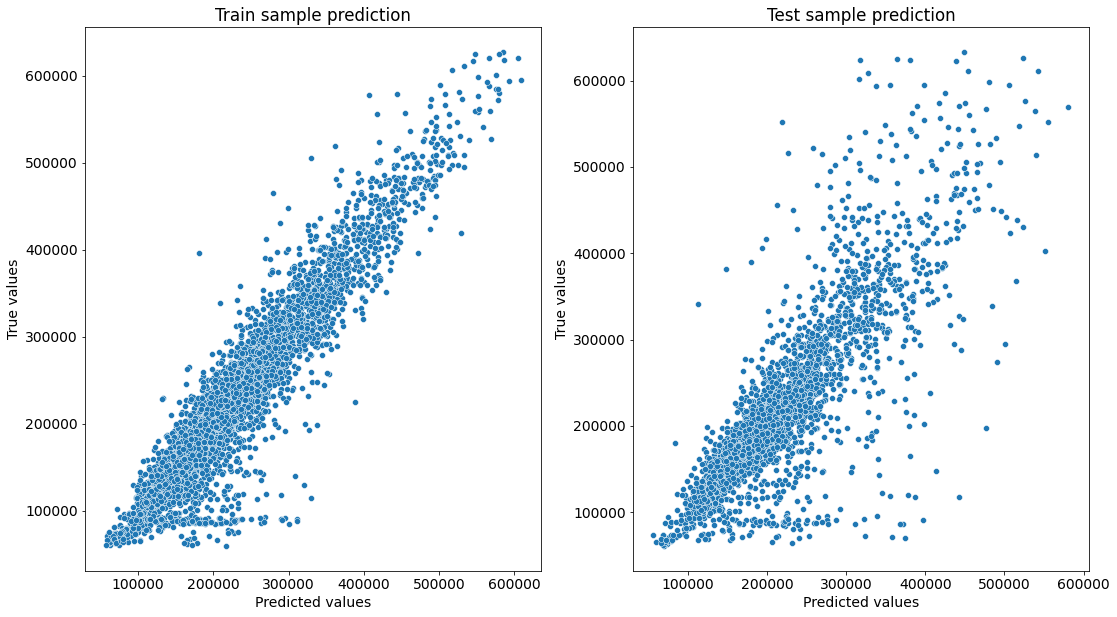

In [141]:
# XGBoost
from xgboost import XGBRegressor


xgbr = XGBRegressor(random_state=42,n_estimators=200,max_depth=3)
xgbr.fit(X_train, y_train)

y_train_preds = xgbr.predict(X_train)
y_test_preds = xgbr.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)
#Train R2:0.889
#Test R2:0.687

In [142]:
cv_score3 = cross_val_score(xgbr, X_train, y_train, scoring='r2', cv=KFold(n_splits=3, shuffle=True, random_state=21))
cv_score3
#array([0.73258892, 0.75953253, 0.75954827])

array([0.72283488, 0.7623451 , 0.75994576])

In [143]:
cv_score3.mean()
#0.747638137513536

0.7483752474041361

Train R2:	0.818
Test R2:	0.67


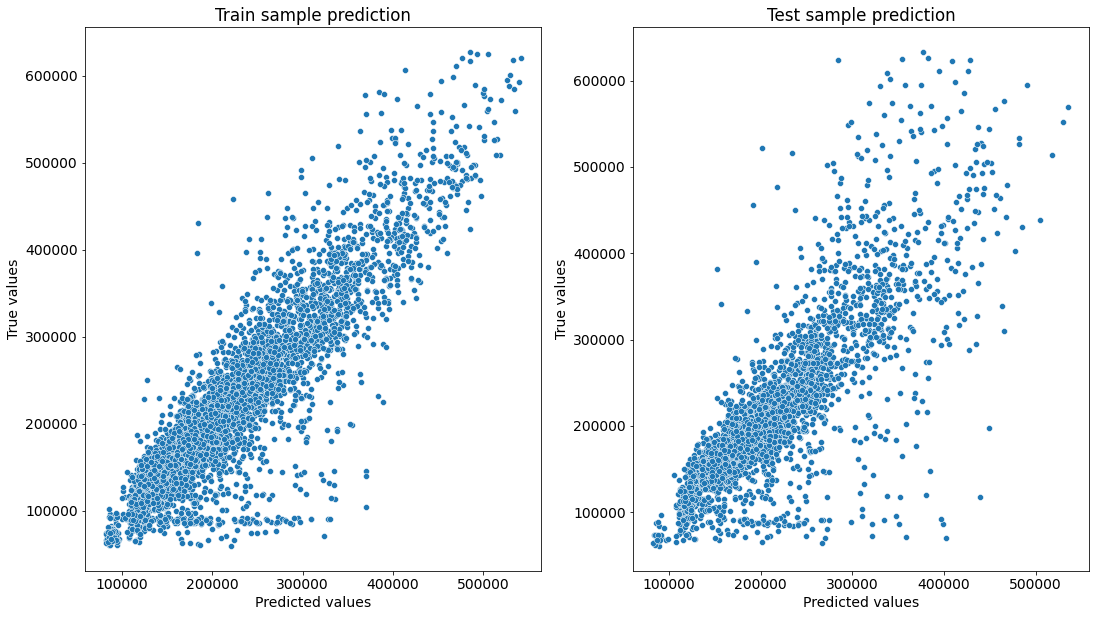

In [144]:
#Cat Boost Regression
from catboost import CatBoostRegressor

cbr = CatBoostRegressor(learning_rate=0.02, depth=8, l2_leaf_reg=3, iterations=300, loss_function='RMSE', eval_metric='R2', 
                             random_seed=21,
                             silent=True)
cbr.fit(X_train, y_train)

y_train_preds = cbr.predict(X_train)
y_test_preds = cbr.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)


In [145]:
cv_score4 = cross_val_score(cbr, X_train, y_train, scoring='r2', cv=KFold(n_splits=3, shuffle=True, random_state=21))
cv_score4

array([0.73581335, 0.76508519, 0.75587349])

In [146]:
# Результат в целом таков, однако результат сам при новом запуске скрипта может немного изменяться... в целом же именно CatBoostRegressor выдает лучший результат
cv_score4.mean()
#0.7530183247249144

0.7522573422477072

In [147]:
#Test
SUBMISSION = r'C:\Users\User\Desktop\submission_LAMA.csv'


In [148]:
submission = pd.read_csv(SUBMISSION)

In [149]:
submission.head()

,Id,Price
0,4567,164256.69
1,5925,119453.28
2,960,139495.66
3,3848,115872.21
4,746,175053.66


In [155]:
#Предсказание на тестовых данных
#RandomForest
test_pred1 = rf.predict(test)
test_pred1

array([161567.68126203, 127732.75387124, 148955.7165737 , ...,
       145886.66955354, 171282.8336119 , 272722.98525725])

In [156]:
submission['Price'] = test_pred1
submission_1 = submission 
submission_1.head()

,Id,Price
0,4567,161567.681262
1,5925,127732.753871
2,960,148955.716574
3,3848,162282.282252
4,746,171039.890246


In [157]:
#LGBMRegressor
test_pred2 = cbr.predict(test)
test_pred2

array([155289.12383401, 119523.55335591, 165138.57292066, ...,
       143372.0809527 , 168845.93866539, 237928.04052011])

In [158]:
submission['Price'] = test_pred2
submission_2 = submission 
submission_2.head()


,Id,Price
0,4567,155289.123834
1,5925,119523.553356
2,960,165138.572921
3,3848,121142.641307
4,746,165897.988827


In [161]:
# XGBoost
test_pred3 = gbm.predict(test)
test_pred3

array([164337.78018571, 123289.22532214, 142704.80477678, ...,
       151196.23260634, 174120.22704741, 278108.81231766])

In [162]:
submission['Price'] = test_pred3
submission_3 = submission 
submission_3.head()

,Id,Price
0,4567,164337.780186
1,5925,123289.225322
2,960,142704.804777
3,3848,117952.192383
4,746,168554.087509


In [163]:
# XGBoost
test_pred4 = xgbr.predict(test)
test_pred4

array([164994.06 , 123576.805, 138263.89 , ..., 148363.33 , 176868.03 ,
       277025.38 ], dtype=float32)

In [164]:
submission['Price'] = test_pred4
submission_4 = submission 
submission_4.head()

,Id,Price
0,4567,164994.062500
1,5925,123576.804688
2,960,138263.890625
3,3848,122198.093750
4,746,169374.500000


In [165]:
submission = pd.read_csv(SUBMISSION)

In [166]:
submission.head()

,Id,Price
0,4567,164256.69
1,5925,119453.28
2,960,139495.66
3,3848,115872.21
4,746,175053.66


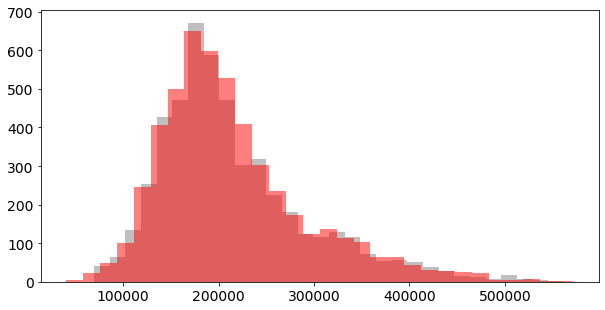

In [170]:
# Сравнение Сat Boost on test со значениями  submission_LAMA
#submission['Price'].hist(bins=30)
#submission_4['Price'].hist(bins=30)
plt.hist(submission['Price'], bins=30, alpha=0.5, label='Class0', color='#808080')
plt.hist(submission_2['Price'], bins=30, alpha=0.5, label='Class1', color='#ff0000')
plt.rcParams.update({'figure.figsize': (1, 5)})

plt.show()

In [171]:
submission_2.to_csv('cbr_submit.csv', index = False)